In [1]:
import numpy as np
import os

from body_measurements.measurement import Body3D

In [2]:
from smplx import SMPL

In [3]:
model = SMPL('data/body_models/smpl')

In [4]:
model_output = model()

In [5]:
model_output.vertices.detach().numpy()[0]

array([[ 0.04487304,  0.49407476,  0.08962061],
       [ 0.03947177,  0.4813834 ,  0.09960105],
       [ 0.05001033,  0.47607607,  0.09099279],
       ...,
       [-0.0747897 ,  0.4280528 ,  0.00464639],
       [-0.07539963,  0.42922547,  0.00667244],
       [-0.07775019,  0.42762733,  0.00917185]], dtype=float32)

In [ ]:
body = Body3D(model_output.vertices.detach().numpy()[0], model.faces)

In [6]:
from matplotlib import pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [452]:
ID_BY_MEASUREMENT_NAME

{'sideneck_to_bust': 0,
 'bust_circle': 1,
 'bust_to_bust': 2,
 'underbust_circle': 3,
 'naturale_waist_circle': 4,
 'trouser_waist_circle': 5,
 'hip_circle': 6,
 'thigh_circle': 7,
 'ankle_circle': 8,
 'bicep_circle': 9,
 'calc_circle': 10,
 'elbow_circle': 11,
 'knee_circle': 12,
 'neck_base_circle': 13,
 'neck_side_to_wrist': 14,
 'neck_circle': 15,
 'shoulder_to_shoulder': 16,
 'shoulder_to_wrist': 17,
 'wrist_circle': 18}

In [660]:
import torch
beta_vars = []
measurements = []
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
for i in range(1000):
    betas = torch.randn(1, 10).float() * 1.25
    beta_vars.append(betas)
    model_output = model(betas=betas,body_pose=pose_params)
    measurements.append(make_measurements(model, betas).detach().numpy())

In [661]:
from scipy.stats import pearsonr
x = [el[ID_BY_MEASUREMENT_NAME['bust_circle']] - el[ID_BY_MEASUREMENT_NAME['underbust_circle']] for el in measurements]
y = [el[ID_BY_MEASUREMENT_NAME['bust_circle']] for el in measurements]
corr, _ = pearsonr(x, y)
print(corr)

-0.02982622263593982


In [662]:
ID_BY_MEASUREMENT_NAME

{'sideneck_to_bust': 0,
 'bust_circle': 1,
 'underbust_circle': 2,
 'naturale_waist_circle': 3,
 'trouser_waist_circle': 4,
 'hip_circle': 5,
 'thigh_circle': 6,
 'ankle_circle': 7,
 'bicep_circle': 8,
 'calc_circle': 9,
 'elbow_circle': 10,
 'knee_circle': 11,
 'neck_base_circle': 12,
 'neck_side_to_wrist': 13,
 'neck_circle': 14,
 'shoulder_to_shoulder': 15,
 'shoulder_to_wrist': 16,
 'wrist_circle': 17,
 'height': 18}

In [663]:
for x in MEASUREMENT_NAMES:
    for y in MEASUREMENT_NAMES:
        xx = [el[ID_BY_MEASUREMENT_NAME[x]] for el in measurements]
        yy = [el[ID_BY_MEASUREMENT_NAME[y]] for el in measurements]
        corr, _ = pearsonr(xx, yy)
        if corr > 0.8:
            print(x, y, corr)

sideneck_to_bust sideneck_to_bust 0.9999999999999999
sideneck_to_bust bust_circle 0.8626501113902543
sideneck_to_bust naturale_waist_circle 0.8332111029281574
sideneck_to_bust trouser_waist_circle 0.9036883679480731
sideneck_to_bust hip_circle 0.8599269441272429
sideneck_to_bust bicep_circle 0.8023635892066537
sideneck_to_bust knee_circle 0.8163154459542107
bust_circle sideneck_to_bust 0.8626501113902543
bust_circle bust_circle 1.0
bust_circle underbust_circle 0.9539609481903022
bust_circle naturale_waist_circle 0.9838992141787571
bust_circle trouser_waist_circle 0.9721505639856748
bust_circle hip_circle 0.8593748214509986
bust_circle bicep_circle 0.9439833853462233
bust_circle calc_circle 0.8011197651360717
bust_circle elbow_circle 0.8686020621257514
bust_circle neck_base_circle 0.8760854794991265
bust_circle neck_circle 0.8030063586718751
underbust_circle bust_circle 0.9539609481903022
underbust_circle underbust_circle 1.0
underbust_circle naturale_waist_circle 0.9824120214661831
und

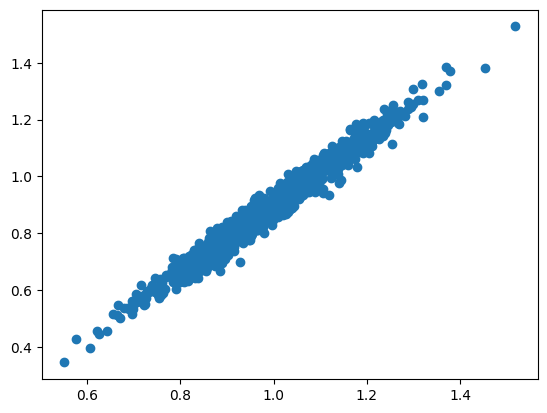

In [650]:
x = [el[ID_BY_MEASUREMENT_NAME['bust_circle']] for el in measurements]
y = [el[ID_BY_MEASUREMENT_NAME['naturale_waist_circle']] for el in measurements]
plt.plot(x, y, 'o')

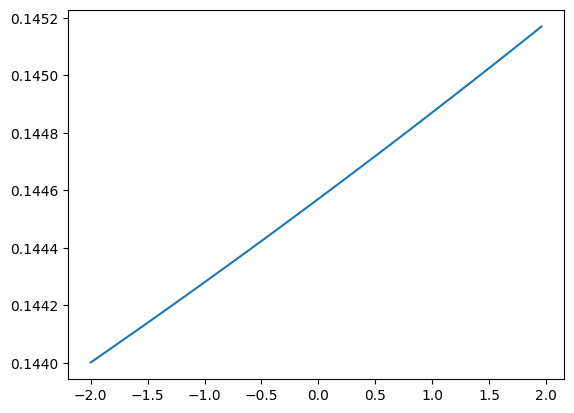

In [224]:
plt.plot(beta_vars, natural_waist_circle)

In [20]:
import torch
model_output.betas

tensor([[-0.6758, -1.2964,  0.0971,  1.8699,  0.5624, -1.2110, -0.7113, -0.0381,
         -0.7419, -0.0953]])

In [21]:
sorted(vertices_idx_by_measurement.keys())

['ankle_circle',
 'bicep_circle',
 'bust_circle',
 'bust_to_bust',
 'calc_circle',
 'elbow_circle',
 'hip_circle',
 'knee_circle',
 'naturale_waist_circle',
 'neck_base_circle',
 'neck_circle',
 'neck_side_to_wrist',
 'shoulder_to_shoulder',
 'shoulder_to_wrist',
 'sideneck_to_bust',
 'thigh_circle',
 'trouser_waist_circle',
 'underbust_circle',
 'wrist_circle']

In [22]:
make_measurements(torch.zeros(1,10))

NameError: name 'make_measurements' is not defined

In [23]:
make_measurements(optim_betas)

NameError: name 'make_measurements' is not defined

In [24]:
def test_measurement(betas, measurement_name='elbow_circle'):
    pose_params = torch.zeros(1,69)
    pose_params[0][47] = 5.6
    pose_params[0][50] = -5.6
    model_output = model(betas=betas,body_pose=pose_params)
    result = torch.zeros(1)
    for i in range(len(vertices_idx_by_measurement[measurement_name][0])):
        current_idx = vertices_idx_by_measurement[measurement_name][0][i]
        prev_idx = vertices_idx_by_measurement[measurement_name][0][i - 1]
        result += torch.sum(torch.square(model_output.vertices[0][current_idx] - model_output.vertices[0][prev_idx]))
    return torch.sqrt(result)
print(test_measurement(torch.zeros(1,10)))
torch.mean(torch.square(test_measurement(torch.zeros(1,10)) - torch.tensor([1])))

tensor([0.0673], grad_fn=<SqrtBackward0>)


tensor(0.8700, grad_fn=<MeanBackward0>)

In [25]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
model_output = model(betas=torch.zeros(1,10),body_pose=pose_params)
model_output.body_pose

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  5.6000,
          0.0000,  0.0000, -5.6000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [26]:
import copy
def measurements_ik_solver(model, target, init_betas, device='cpu', max_iter=20,
                               mse_threshold=1e-8):
    optim_betas = copy.deepcopy(init_betas)
    optim_betas = optim_betas.reshape(-1).unsqueeze(0).to(device)
    optim_betas = optim_betas.requires_grad_(True)

    optimizer = torch.optim.Adam([optim_betas], lr=0.1)
    last_mse = 0
    
    default_measurements = make_measurements(torch.zeros(1,10))

    for i in range(max_iter):
        mse = torch.mean(torch.square((make_measurements(optim_betas) - target) / default_measurements))
        print(mse)
        if abs(mse - last_mse) < mse_threshold:
            return optim_betas
        optimizer.zero_grad()
        mse.backward(retain_graph=True)
        optimizer.step()
        last_mse = mse

    print(f'IK final loss {last_mse.item():.3f}')
    return optim_betas

In [27]:
make_measurements(torch.zeros(1,10)).detach()

NameError: name 'make_measurements' is not defined

In [ ]:
target_measurements = copy.deepcopy(make_measurements(torch.zeros(1,10)).detach())
target_measurements[1] *= 1.8

In [ ]:
optim_betas = measurements_ik_solver(model, target_measurements, torch.zeros(1,10))

In [ ]:
print(make_measurements(optim_betas))
print(make_measurements(torch.zeros(1,10)))

In [ ]:
optim_betas

In [ ]:
torch.sum(torch.square(model_output.vertices[0][0] - model_output.vertices[0][1]))

In [ ]:
a = torch.zeros(1)

In [ ]:
a += torch.sum(torch.square(model_output.vertices[0][0] - model_output.vertices[0][1]))

In [ ]:
a

In [28]:
vertices_idx_by_measurement = {}
points_vars_by_measurement = {}
measurements_raw = female.split('\n')
for i in range(len(measurements_raw)):
    measurement_raw = measurements_raw[i]
    if len(measurement_raw.split(' ')) == 1:
        print(measurement_raw)
        current_measurement_name = measurement_raw
        points_vars_by_measurement[current_measurement_name] = []
        vertices_idx_by_measurement[current_measurement_name] = []
        continue
    vertices_idxs = [int(el) for el in measurement_raw.split(' ')[1:]]
    vertices_idx_by_measurement[current_measurement_name].append(vertices_idxs)
    points_to_append = [model_output.vertices.detach().numpy()[0][el] for el in vertices_idxs]
    points_vars_by_measurement[current_measurement_name].append(points_to_append)

ankle_circle
bust_circle
bicep_circle
bust_to_bust
calc_circle
elbow_circle
hip_circle
knee_circle
naturale_waist_circle
neck_base_circle
neck_side_to_wrist
neck_circle
shoulder_to_shoulder
shoulder_to_wrist
sideneck_to_bust
thigh_circle
trouser_waist_circle
underbust_circle
wrist_circle


In [ ]:
points_vars_by_measurement

In [ ]:
paths_female = {
    "neck_base_circle_1": "3164 3919 3769 3725 3734 4792 4305 4307 4075 4072 4189 4900 6496 3169 3062 1427 701 584 585 820 817 1312 222 211 256 424",
    "neck_base_circle_2": "3164 3919 3769 3725 3734 4792 4305 4307 4074 4072 4782 3171 1300 584 586 820 817 1312 222 211 256 424",
    "neck_base_circle_3": "3164 3919 3769 3725 3734 4792 4305 4307 4075 4780 4781 4187 6333 3078 2872 700 1299 1298 585 820 817 1312 222 211 256 424",
    "ankle_circle_1": "3203 3202 3205 3204 3207 3208 3326 3325 3324 3209 3199 3198 3210 3201 3200",
    "ankle_circle_2": "3331 3330 3329 3328 3327 3469 3335 3334 3333 3332 3432 3433 3434 3436 3435",
    "anke_circle_3": "3416 3415 3417 3418 3401 3400 3399 3370 3379 3380 3381 3391 3390 3392 3393 3395",
    ""
}
points = {}
for elem in paths:
    vertices = [int(el) for el in paths[elem].split(' ')]
    paths[elem] = vertices
    points[elem] = [model_output.vertices.detach().numpy()[0][el] for el in vertices]

In [ ]:
model_output.vertices.detach().numpy()[0]

In [ ]:
points_vars_by_measurement["sideneck_to_bust"][0]

In [23]:
from random import randint
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[2,255,255])
for measurement_name in points_vars_by_measurement:
    if measurement_name != "calc_circle":
        continue
    colour = [randint(0, 255), randint(0, 255), randint(0, 255)]
    for points_var in points_vars_by_measurement[measurement_name]:
        points = points + trimesh.PointCloud(np.array(points_var), colors=colour)
print(points)
#points_2 = trimesh.PointCloud(np.array(points_vars_by_measurement["neck_base_circle"][1]), colors=[129,0,0])
#points.show()

<trimesh.PointCloud(vertices.shape=(6980, 3))>


In [ ]:
trimesh.Scene(points).show()

In [ ]:
trimesh.Scene(points).show()

In [26]:
points.show()

In [ ]:
mesh = trimesh.Trimesh(model_output.vertices.detach().numpy()[0], model.faces)
mesh.show()
#points.show()

In [ ]:
plt.plot(x, height)

In [ ]:
plt.plot(x, weight)

In [ ]:
plt.plot(x, chest)

In [ ]:
plt.plot(x, hip)

In [ ]:
a = make_measurements(torch.zeros(1,10))
b = make_measurements(torch.ones(1,10))

In [ ]:
a

In [ ]:
b

In [ ]:
torch.mean(torch.square((a - b) / a))

In [665]:
from smplx import SMPL
import torch

FEMALE_VERTICES_PATHS = """sideneck_to_bust
v 3721 3943 4762 4073 4072 4780 4076 4079 4081 4085 6319 6479 6478 6489
v 6488 6477 6480 4111 4154 4080 4078 4077 4779 4308 3730 3720
bust_circle
v 3077 2871 691 686 599 598 669 668 1421 1424 613 1197 1196 1423 645 642 736 723 893 2850 2849 3025 3505 6475 6311 6310 4379 4212 4130 4131 4895 4683 4682 4099 4898 4894 4156 4159 4086 4089 4174 4179 6331
v 3077 2871 691 684 687 943 3042 3040 3041 3044 3043 612 613 1197 1196 1423 645 642 736 723 893 2850 2849 3025 3505 6475 6311 6310 4379 4212 4130 4131 4895 4683 4682 4099 4100 6490 6491 6487 6488 6489 4428 4173 4172 4179 6331
v 4099 4897 4893 4157 4158 4087 4088 4175 4179 6331 3077 2871 691 685 600 601 670 671 1420 1425 613 1197 1196 1423 645 642 736 723 893 2850 2849 3025 3505 6475 6311 6310 4379 4212 4130 4131 4895 4683 4682
underbust_circle
v 1329 1200 927 928 658 659 1757 1758 940 618 621 1268 725 894 1212 767 766 3017 4256 4255 4695 4378 4211 4751 4107 4106 4426 5225 5224 4149 4146 4415 4413 4688
v 1330 1201 1202 2846 1426 615 614 2883 941 619 620 1269 794 2844 1211 768 765 3016 4253 4254 4694 6304 4283 4752 4108 4109 4427 6342 4102 4105 4899 6307 4686 4687
v 3721 4779 6488
v 943 1351 1352 2857 594 595 666 592 590 591 1297 585 586 821 1279 297
v 297 1279 821 586 585 1297 591 1808 1295 1296 624 625 2858 3032 3033 3042
v 297 1297 3042
naturale_waist_circle
v 3504 1335 1332 1345 1344 664 663 656 655 630 633 721 798 797 2836 2833 1251 1248 3020 3023 6472 4731 4732 6294 6295 4287 4286 4209 4119 4118 4145 4144 4153 4152 4821 4820 4808 4809
v 3500 1336 917 916 919 918 665 662 657 654 631 632 720 799 796 890 889 3124 3018 3019 3502 6473 6474 6545 4376 4375 4284 4285 4208 4120 4121 4142 4143 4150 4151 4406 4405 4403 4402 4812
v 1769 858 861 920 855 679 678 705 938 677 676 800 802 801 887 888 2930 2914 2913 3022 6373 6372 6387 4374 4372 4289 4290 4288 4164 4165 4424 4193 4166 4167 4341 4404 4345 4344
v 3503 859 860 1203 856 857 1448 1449 939 846 830 831 844 845 886 2928 2929 1779 1782 3021 5245 5244 6388 6389 4373 4330 4331 4316 4317 4332 4425 4921 4922 4342 4343 4689 4346 4347
v 3507 2922 2923 2925 2920 2921 2926 2927 2924 2919 2915 2916 2917 2918 2911 2910 3122 1780 1781 1784 5246 5247 6544 6371 6370 6376 6377 6374 6375 6378 6383 6385 6386 6379 6380 6384 6381 6382
trouser_waist_circle
v 3021 5245 5244 6388 6389 4373 4330 4331 4316 4317 6385 6386 6379 6568 6569 3160 3152 3153 2921 2926 2927 830 831 844 845 886 2928 2929 1779 1782
v 3021 5245 5244 6388 6389 4373 4330 4331 4316 4317 6378 6383 6572 6573 6566 6567 5265 5268 5267 1806 1805 1804 1803 3150 3151 3156 3157 2924 2919 830 831 844 845 886 2928 2929 1779 1782
v 1784 5246 5247 6544 6371 6370 6376 6377 6374 6375 6378 6570 6572 6573 5263 5266 5265 4351 4350 1807 864 863 1803 1802 1801 3156 3157 3154 2919 2915 2916 2917 2918 2911 2910 3122 1780 1781
hip_circle
v 3120 4729 4730 6530 6531 6538 6515 6508 4296 4297 4310 4418 4984 4985 4400 4398 4691 4348 4349 3510 865 862 1206 912 914 1512 1513 932 823 809 810 3085 3091 3115 3108 3109 1246 1247
v 3484 4326 4327 6529 6532 6534 6514 6510 4295 4298 4311 4352 4353 4983 4399 4398 4691 4348 4349 3510 865 862 1206 912 915 1511 869 866 822 808 807 3086 3090 3110 3107 3106 843 840
v 3119 6541 6539 6540 6559 6558 6557 6509 4919 4920 4927 6549 6554 6873 4951 4401 4759 4969 4814 4815 3145 1339 1338 1497 1276 913 1480 3475 3133 3128 1454 1446 1447 3084 3136 3137 3138 3116 3117 3118
v 3141 6561 6560 6528 6527 6526 6518 6517 6551 6550 4801 4802 4950 6877 6555 4952 1479 3134 3479 1477 1322 1321 3129 3130 3094 3093 3103 3105 3104 3139 3140
thigh_circle
v 870 871 1361 1362 1514 1534 1222 1221 1164 1165 879 1452 1161 1159 1500 1501 1478 1229 1228 1263 1262 833 834
v 3126 3127 3135 3131 3132 1159 1500 1501 1478 1229 1228 1263 1262 833 834 870 1361 1137
v 834 870 1361 1137 1140 1475 1226 1225 1162 1159 1500 1501 1478 1229 1228 1263 1262 833
v 1230 900 1138 1139 1360 1227 1224 1274 1499 876 875 872 847 850 944 854 853
v 933 936 1359 963 908 911 1366 877 874 873 848 849 902 851 852 897 900
v 4361 4839 4395 4394 4450 4835 4420 4419 4384 4383 4340 4337 4389 4335 4336 4358 4360
v 4626 4836 4356 4357 4713 4339 4338 4430 4334 4333 4359 4363 4362 4971 4757 4707 4708 4834 4625
v 4925 4970 4705 4706 5005 4986 4837 4836 4356 4357 4320 4321 4746 4745 4712 4711 4949 4973 4972 4645 4646 6552
v 4972 4645 4646 4710 4709 4948 4624 4623 4837 4356 4324 4320 4321 4746 4745 4712 4711 4949 4973
ankle_circle
v 3203 3202 3205 3204 3207 3208 3326 3325 3324 3209 3199 3198 3210 3201 3200
v 3331 3330 3329 3328 3327 3469 3335 3334 3333 3332 3432 3433 3434 3436 3435
v 3416 3415 3417 3418 3401 3400 3399 3370 3379 3380 3381 3391 3390 3392 3393 3395
v 6603 6602 6606 6604 6607 6608 6725 6726 6724 6609 6599 6598 6610 6601 6600
v 6730 6731 6729 6727 6728 6869 6735 6734 6732 6733 6832 6833 6834 6836 6835
v 6790 6791 6781 6780 6779 6770 6799 6800 6801 6818 6817 6815 6816 6794 6793 6792
bicep_circle
v 1870 1871 1510 1508 1860 1874 1875 1883 1882 2988 1889 1888 2996 2991 1892 1878 1877 2902 718 719 1869 1867 1866 1865 769 772
v 1415 1343 1342 1400 1443 1442 1440 1439 2989 1358 1357 2995 2992 774 773 1876 1901 1433 1432 785 784 1282 1502 770 771 1538
v 1430 1431 786 787 1281 777 780 1543 1507 1416 1340 1341 1399 1444 1445 1441 1438 2990 1355 1356 2994 2993 775 776 1902 1903
v 2895 2984 2982 2980 2978 2900 1261 1260 1413 792 791 778 779 1411 1410 1428 1429 1408 1407 1505 1506
v 4258 5331 5332 4981 4980 5321 5335 5336 5343 5344 6447 5349 5350 6455 6450 5353 5337 5338 6361 4206 4205 5330 5328 5326 5327 4257
v 5009 4888 4817 4818 4872 4918 4915 4913 4914 6448 4831 4832 6454 6451 4264 4261 5339 5362 4904 4905 4275 4272 4763 4974 4260 4259
v 4903 4906 4274 4273 4764 4265 4266 5012 4979 4889 4816 4819 4873 4917 4916 4912 4911 6449 4830 4833 6453 6452 4263 4262 5364 5363
v 4742 4743 4887 4280 4281 4268 4267 4884 4885 4902 4901 4879 4880 4978 4977 6354 6443 6441 6440 6437 6359
calc_circle
v 1181 1090 1093 1527 1525 1153 1151 1177 1102 1098 1101 1082 1083 1468 1183
v 1464 1091 1092 1528 1088 1087 1155 1371 1103 1099 1100 1097 1096 1469 1467
v 1466 1108 1111 1530 1089 1086 1154 1372 1074 1077 1470 1094 1095 1473 1465
v 4576 4667 4668 4942 4571 4568 4585 4584 4588 4662 4637 4638 4996 4997 4577
v 4579 4937 4939 4941 4582 4581 4586 4587 4589 4844 4641 4575 4574 4999 4578
v 4594 4940 4938 4946 4583 4580 4943 4561 4560 4845 4640 4572 4573 5000 4595
elbow_circle
v 5112 5168 5171 5207 5087 5083 5082 5163 5132 5133 5036 5035 5192 5097 5096 5113
v 5092 5169 5170 5221 5086 5084 5085 5164 5212 5213 5033 5034 5193 5098 5099 5093
v 5202 5205 5126 5127 5371 5090 5091 5135 5124 5125 5120 5121 5134 5116 5117 5194 5131 5130
v 1620 1621 1910 1660 1657 1736 1732 1662 1661 1725 1646 1647 1664 1650 1651 1654 1655 1666
v 1700 1699 1643 1644 1627 1630 1723 1566 1565 1665 1663 1694 1613 1616 1618 1738
v 1701 1702 1623 1626 1628 1629 1724 1567 1564 1744 1743 1695 1614 1615 1617 1752
knee_circle
v 1047 1055 1054 1052 1053 1069 1051 1049 1050 1062 1061 1523 1059 1058 1149 1369 1048
v 1043 1044 1012 1010 1008 1004 1005 1002 999 998 995 1522 1015 1016 1148 1018 1019
v 1178 1073 1070 1067 1068 1066 1064 1065 1063 1060 1524 1056 1057 1150 1370
v 4533 4534 4842 4635 4544 4543 4994 4549 4548 4535 4536 4537 4554 4538 4539 4540 4541
v 4529 4505 4506 4634 4500 4501 4993 4481 4482 4485 4486 4491 4492 4493 4495 4498 4532
v 4664 4843 4636 4545 4542 4995 4546 4547 4550 4551 4552 4555 4553 4556 4558
neck_base_circle
v 3164 3919 3769 3725 3734 4792 4305 4307 4075 4072 4189 4900 6496 3169 3062 1427 701 584 585 820 817 1312 222 211 256 424
v 3164 3919 3769 3725 3734 4792 4305 4307 4074 4072 4782 3171 1300 584 586 820 817 1312 222 211 256 424
v 3164 3919 3769 3725 3734 4792 4305 4307 4075 4780 4781 4187 6333 3078 2872 700 1299 1298 585 820 817 1312 222 211 256 424
neck_circle
v 3049 333 308 309 296 174 175 299 224 223 300 301 305 302 3814 3813 3812 3736 3735 3811 3686 3687 3808 3817 3818 3840
v 3050 334 284 285 150 153 298 206 209 213 212 257 423 460 3918 3768 3724 3723 3719 3718 3810 3663 3662 3797 3796 3839
v 3057 451 214 217 151 152 297 207 208 210 211 256 424 3164 3919 3769 3725 3722 3720 3721 3809 3664 3665 3727 3726 3942
v 3068 1331 215 216 440 441 452 218 219 222 425 426 453 829 3944 3921 3920 3734 3731 3730 3943 3935 3934 3728 3729 4807
v 3059 572 571 1320 1319 1279 1280 1313 1312 824 825 826 827 828 4315 4314 4313 4312 4792 4793 4761 4762 4799 4800 4061 4060
shoulder_to_shoulder
v 1862 1238 1239 783 711 606 607 742 818 803 824 425 426 453 829 3944 3921 3920 4312 4291 4306 4230 4097 4094 4198 4270 4724 4721 5325
v 5342 5285 5282 5310 4269 4271 5272 4232 4231 4294 4292 4301 4302 4702 3470 1219 812 813 806 804 744 743 1810 782 781 1849 1821 1822
v 1862 5325
v 5342 1822
wrist_circle
v 5663 5644 5643 5690 5533 5481 5479 5558 5476 5475 5486 5549 5495 5494 5527 5664
v 5670 5740 5695 5689 5534 5480 5571 5560 5559 5561 5562 5550 5521 5520 5569 5567
v 5669 5702 5696 5691 5573 5570 5572 5564 5563 5565 5566 5609 5608 5568 5567 5668
v 5705 5430 5431 5383 5384 5386 5388 5389 5703 5704 5747 5396 5397 5440 5404 5405
v 2015 2097 2020 2018 2072 2229 2182 2185 2202 2203 2066 2033 2032 2088 2025 2016
v 2100 2099 2098 2111 2019 2073 2228 2234 2279 2209 2207 2107 2060 2059 2089 2101
v 2104 2103 2102 2110 2109 2112 2230 2235 2241 2208 2206 2106 2108 2147 2148 2105
v 2286 2243 2242 1930 1927 1926 1924 1922 1970 1969 2244 1945 1943 1979 1938 1935"""


VERTICES_IDX_BY_MEASUREMENT = {}
POINTS_VARS_BY_MEASUREMENT = {}
ID_BY_MEASUREMENT_NAME = {}
MEASUREMENT_NAMES = []

def init_variables():
    model = SMPL('data/body_models/smpl')
    model_output = model()
    measurements_raw = FEMALE_VERTICES_PATHS.split('\n')
    for i in range(len(measurements_raw)):
        measurement_raw = measurements_raw[i]
        if len(measurement_raw.split(' ')) == 1:
            current_measurement_name = measurement_raw
            MEASUREMENT_NAMES.append(current_measurement_name)
            POINTS_VARS_BY_MEASUREMENT[current_measurement_name] = []
            VERTICES_IDX_BY_MEASUREMENT[current_measurement_name] = []
            continue
        vertices_idxs = [int(el) for el in measurement_raw.split(' ')[1:]]
        VERTICES_IDX_BY_MEASUREMENT[current_measurement_name].append(vertices_idxs)
        points_to_append = [model_output.vertices.detach().numpy()[0][el] for el in vertices_idxs]
        POINTS_VARS_BY_MEASUREMENT[current_measurement_name].append(points_to_append)

    for i, measurement_name in enumerate(MEASUREMENT_NAMES):
        ID_BY_MEASUREMENT_NAME[measurement_name] = i
    MEASUREMENT_NAMES.append('height')
    ID_BY_MEASUREMENT_NAME['height'] = len(MEASUREMENT_NAMES) - 1

init_variables()

In [666]:
ID_BY_MEASUREMENT_NAME

{'sideneck_to_bust': 0,
 'bust_circle': 1,
 'underbust_circle': 2,
 'naturale_waist_circle': 3,
 'trouser_waist_circle': 4,
 'hip_circle': 5,
 'thigh_circle': 6,
 'ankle_circle': 7,
 'bicep_circle': 8,
 'calc_circle': 9,
 'elbow_circle': 10,
 'knee_circle': 11,
 'neck_base_circle': 12,
 'neck_circle': 13,
 'shoulder_to_shoulder': 14,
 'wrist_circle': 15,
 'height': 16}

In [667]:
def make_measurements(model, betas):
    pose_params = torch.zeros(1,69)
    pose_params[0][47] = 5.6
    pose_params[0][50] = -5.6
    model_output = model(betas=betas,body_pose=pose_params)
    vertices = model_output.vertices[0]

    measurements = torch.zeros(len(MEASUREMENT_NAMES))
    
    for i, measurement_name in enumerate(MEASUREMENT_NAMES):
        if i == len(MEASUREMENT_NAMES) - 1:
            break
        #print(measurement_name)
        #print(measurement_name)
        for path in VERTICES_IDX_BY_MEASUREMENT[measurement_name][:1]:
            path_length = torch.zeros(1)
            for j in range(len(path)):
                #print(path[j], torch.sum(torch.square(vertices[path[j]] - vertices[path[j-1]])))
                path_length += torch.sqrt(torch.sum(torch.square(vertices[path[j]] - vertices[path[j-1]])))
            #print(path_length)
            measurements[i] += path_length[0]
            #print(torch.sqrt(path_length))
        #measurements[i] /= len(VERTICES_IDX_BY_MEASUREMENT[measurement_name])
    
    #measurements[ID_BY_MEASUREMENT_NAME['bust_circle']] -= measurements[ID_BY_MEASUREMENT_NAME['underbust_circle']]
    measurements[ID_BY_MEASUREMENT_NAME['height']] += model_output.vertices[0][411][1] - model_output.vertices[0][6677][1]
    return measurements

In [668]:
make_measurements(model, torch.zeros(1,10))

tensor([0.5366, 0.9855, 0.8937, 0.8880, 0.9385, 1.0347, 0.6679, 0.2325, 0.3590,
        0.3710, 0.2685, 0.3550, 0.4406, 0.3782, 0.7002, 0.1817, 1.7174],
       grad_fn=<CopySlices>)

In [669]:
import copy
def measurements_ik_solver(model, target, init_betas, device='cpu', max_iter=1000,
                               mse_threshold=1e-7):
    print("init betas are: {}".format(init_betas))
    optim_betas = copy.deepcopy(init_betas)
    optim_betas = optim_betas.reshape(-1).unsqueeze(0).to(device)
    optim_betas = optim_betas.requires_grad_(True)


    #### поиграться с lr
    optimizer = torch.optim.Adam([optim_betas], lr=0.01)
    last_mse = 0

    default_measurements = make_measurements(model, torch.zeros(1,10))
    current_measurements = make_measurements(model, init_betas)

    for i in range(max_iter):
        #print("measurements", torch.mean(torch.square((make_measurements(model, optim_betas) - target) / current_measurements)))
        #print("betas", torch.mean(torch.square(optim_betas - init_betas)))
        mse = torch.mean(torch.square((make_measurements(model, optim_betas) - target))) #+ 0.00001 * torch.sum(torch.square(optim_betas))
        if abs(mse - last_mse) < mse_threshold:
            print("early stop")
            print(f'IK final loss {mse}')
            return copy.deepcopy(torch.tensor(optim_betas.detach().numpy()))
        optimizer.zero_grad()
        mse.backward(retain_graph=True)
        optimizer.step()
        last_mse = mse

    print(f'IK final loss {last_mse}')
    return copy.deepcopy(torch.tensor(optim_betas.detach().numpy()))

In [675]:
target_measurements = copy.deepcopy(make_measurements(model,  torch.tensor([[-0.2665, -0.2634,  0.9427, -0.6616,  0.3734,  0.8323,  2.1322,  0.0372,
         -0.1343, -1.2409]])).detach())
target_measurements[ID_BY_MEASUREMENT_NAME['bust_circle']] *= 1.1
target_measurements

tensor([0.5404, 1.1479, 0.9365, 0.9594, 1.0121, 1.0846, 0.6983, 0.2362, 0.3710,
        0.3809, 0.2734, 0.3680, 0.4462, 0.3852, 0.6844, 0.1826, 1.6959])

In [677]:
for i in range(1):
    optim_betas = measurements_ik_solver(model, target_measurements, torch.tensor([[-0.2665, -0.2634,  0.9427, -0.6616,  0.3734,  0.8323,  2.1322,  0.0372,
         -0.1343, -1.2409]]))  #torch.randn(1, 10).float())
    print(target_measurements)
    print(optim_betas)
    print(make_measurements(model, optim_betas))

init betas are: tensor([[-0.2665, -0.2634,  0.9427, -0.6616,  0.3734,  0.8323,  2.1322,  0.0372,
         -0.1343, -1.2409]])
early stop
IK final loss 8.094975055428222e-05
tensor([0.5404, 1.1479, 0.9365, 0.9594, 1.0121, 1.0846, 0.6983, 0.2362, 0.3710,
        0.3809, 0.2734, 0.3680, 0.4462, 0.3852, 0.6844, 0.1826, 1.6959])
tensor([[-0.0975,  0.0196, -0.6150, -2.4386,  3.9750,  2.1813,  4.3780,  2.2793,
          2.9221,  1.4344]])
tensor([0.5505, 1.1274, 0.9539, 0.9626, 1.0107, 1.0858, 0.7033, 0.2286, 0.3786,
        0.3754, 0.2702, 0.3651, 0.4494, 0.3685, 0.6835, 0.1751, 1.6949],
       grad_fn=<CopySlices>)


In [678]:
np.random.random()

0.9629363240512263

In [795]:
b = model(betas=torch.zeros(1,10),body_pose=pose_params).joints[0][11] - model(betas=torch.ones(1,10),body_pose=pose_params).joints[0][11]

In [796]:
b.mean(dim=0).detach().numpy()

array(0.02853843, dtype=float32)

In [799]:
model_output

SMPLOutput(vertices=tensor([[[ 0.0381,  0.4707,  0.0919],
         [ 0.0321,  0.4569,  0.1009],
         [ 0.0430,  0.4518,  0.0926],
         ...,
         [-0.0804,  0.4055,  0.0097],
         [-0.0808,  0.4068,  0.0114],
         [-0.0831,  0.4052,  0.0139]]], grad_fn=<AsStridedBackward0>), joints=tensor([[[-1.0390e-03, -1.9996e-01,  2.2755e-02],
         [ 7.4863e-02, -2.9556e-01,  8.4359e-03],
         [-7.5038e-02, -2.9667e-01,  1.3025e-02],
         [-3.0557e-03, -9.3091e-02,  5.9251e-03],
         [ 1.0110e-01, -6.8049e-01, -1.1121e-02],
         [-1.1029e-01, -6.8693e-01, -8.1605e-03],
         [-5.0437e-04,  2.6672e-02,  8.7115e-03],
         [ 8.9635e-02, -1.0860e+00, -5.9866e-02],
         [-9.5269e-02, -1.0930e+00, -5.3787e-02],
         [ 2.0996e-03,  7.4903e-02,  4.5325e-02],
         [ 1.1046e-01, -1.1423e+00,  5.4018e-02],
         [-1.1957e-01, -1.1426e+00,  6.4468e-02],
         [ 4.2266e-04,  2.7654e-01, -9.3385e-03],
         [ 8.6592e-02,  1.9296e-01,  7.3814e-03]

In [768]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
model_output = model(betas=torch.zeros(1,10),body_pose=pose_params)
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[128,128,128])
print(model_output.vertices.detach().numpy()[0][max_y_id][1])
print(model_output.vertices.detach().numpy()[0][min_y_id][1])
model_output = model(betas=optim_betas,body_pose=pose_params)
points += trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[0,255, 255])
print(model_output.vertices.detach().numpy()[0][max_y_id][1])
print(model_output.vertices.detach().numpy()[0][min_y_id][1])
points_to_append = []
for i in range(100):
    points_to_append.append(model_output.vertices.detach().numpy()[0][max_y_id] + np.random.random() / 10)
points = points + trimesh.PointCloud(points_to_append, colors=[0,255,255])
trimesh.Scene(points).show()

0.55529124
-1.1621158
0.5303336
-1.1646004


In [765]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
input_params = {'body_pose': torch.tensor([[-7.8253e-02,  2.0135e-02, -3.4444e-02, -5.7842e-02, -6.2159e-02,
          1.4977e-02,  1.3802e-01,  2.8002e-02, -3.8086e-04,  3.1727e-01,
          1.1733e-02, -2.2031e-02,  3.9279e-01, -8.2164e-02,  2.6027e-02,
         -1.2045e-02,  5.3875e-02,  1.7079e-02, -2.0150e-02,  2.0917e-01,
         -9.2706e-02, -1.5973e-02, -1.8849e-01,  7.1510e-02,  8.7226e-02,
          3.8302e-02, -4.2853e-03, -1.1626e-01, -5.0795e-03,  1.5742e-01,
         -1.0287e-01, -3.2010e-02, -1.3091e-01, -1.6659e-01, -4.0394e-02,
         -5.3403e-02,  7.5995e-02, -5.1261e-03, -1.4744e-01,  6.2244e-02,
          1.4294e-01,  3.1142e-01,  6.0510e-03, -1.2745e-01, -4.3275e-02,
          3.1169e-01, -1.6871e-01, -9.0033e-01,  1.9589e-01,  2.0363e-01,
          9.7236e-01,  4.4096e-01, -1.4142e+00,  1.1144e-01,  1.2669e-01,
          4.1471e-01,  2.2931e-03,  3.9900e-02, -1.7725e-01,  1.1085e-01,
          7.1559e-02,  7.7516e-02, -6.3442e-02, -1.3504e-01, -6.2341e-02,
         -1.5888e-01, -1.5059e-01,  7.1352e-02,  1.3634e-01]])}
model_output = model(betas=torch.zeros(1,10), body_pose=pose_params)
mesh_1 = trimesh.Trimesh(vertices=model_output.vertices.detach()[0], faces=model.faces)
model_output = model(betas=optim_betas, body_pose=pose_params)
mesh_2 = trimesh.Trimesh(vertices=model_output.vertices.detach()[0], faces=model.faces, vertex_colors=[0,255,255], face_colors=[0,255,255])
mesh_2.vertices -= [1,0,0]
mesh_1.vertices += [1,0,0]
final_mesh = mesh_1 + mesh_2
final_mesh.show()

In [764]:
model_output = model(betas = optim_betas,body_pose=pose_params)
max_x = -100
max_x_id = 0
max_y = -100
max_y_id = 0
max_z = -100
max_z_id = 0
for i, point in enumerate(model_output.vertices[0].detach().numpy()):
    if point[0] > max_x:
        max_x = point[0]
        max_x_id = i
    if point[1] > max_y:
        max_y = point[1]
        max_y_id = i
    if point[2] > max_z:
        max_z = point[2]
        max_z_id = i
print(max_x, max_y, max_z)

0.7112325 0.55529124 0.1672475


In [730]:
max_y_id

411

In [97]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
model_output = model(betas=torch.ones(1,10),body_pose=pose_params)

import trimesh
from random import randint
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[2,255,255])
for measurement_name in POINTS_VARS_BY_MEASUREMENT:
    if measurement_name != "bust_circle" and measurement_name != 'naturale_waist_circle':
        continue
    colour = [randint(0, 255), randint(0, 255), randint(0, 255)]
    dist_1 = torch.zeros(1)
    dist_2 = torch.zeros(1)
    for i, points_var in enumerate(POINTS_VARS_BY_MEASUREMENT[measurement_name][:1]):
        print(VERTICES_IDX_BY_MEASUREMENT[measurement_name][0][i])
        points = points + trimesh.PointCloud(np.array(points_var), colors=colour)
        dist_1 += torch.sum(torch.square(torch.tensor(POINTS_VARS_BY_MEASUREMENT[measurement_name][0][i]) - torch.tensor(POINTS_VARS_BY_MEASUREMENT[measurement_name][0][i-1])))
        dist_2 += torch.sum(torch.square(model_output.vertices[0][VERTICES_IDX_BY_MEASUREMENT[measurement_name][0][i]] - model_output.vertices[0][VERTICES_IDX_BY_MEASUREMENT[measurement_name][0][i-1]]))
    dist_1 = torch.sqrt(dist_1)
    dist_2 = torch.sqrt(dist_2)
    print(measurement_name, dist_1, dist_2)
print(points)
#points_2 = trimesh.PointCloud(np.array(points_vars_by_measurement["neck_base_circle"][1]), colors=[129,0,0])
#points.show()

3077
bust_circle tensor([0.0194]) tensor([0.0211], grad_fn=<SqrtBackward0>)
3504
naturale_waist_circle tensor([0.0232]) tensor([0.0233], grad_fn=<SqrtBackward0>)
<trimesh.PointCloud(vertices.shape=(6971, 3))>


In [120]:
optim_betas = measurements_ik_solver(model, target_measurements, torch.zeros(1,10))
print(make_measurements(model, torch.zeros(1,10)))
print(target_measurements)
print(optim_betas)
print(make_measurements(model, optim_betas))

init betas are: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0

tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<A

tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<A

In [111]:
optim_betas

tensor([[-0.1696, -0.1041, -1.0938, -0.4470,  1.7230, -0.7311,  0.0035,  1.2240,
          0.3838,  1.3709]])

In [112]:
make_measurements(model, optim_betas)

tensor([0.2778, 0.0311, 0.1618, 0.1414, 0.1723, 0.1479, 0.0602, 0.0756, 0.0958,
        0.0669, 0.0863, 0.0885, 0.6722, 0.0742, 0.3361, 0.5605, 0.0452],
       grad_fn=<CopySlices>)

In [184]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
model_output = model(betas=torch.zeros(1,10),body_pose=pose_params)
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[128,128,128])
model_output = model(betas=optim_betas,body_pose=pose_params)
points += trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[2,255,255])
trimesh.Scene(points).show()

In [185]:
pose_params = torch.zeros(1,69)
pose_params[0][47] = 5.6
pose_params[0][50] = -5.6
model_output = model(betas=optim_betas,body_pose=pose_params)
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[2,255,255])
trimesh.Scene(points).show()

In [305]:
betas = torch.randn(1, 10).float() * 1.
beta_vars.append(betas)
model_output = model(betas=betas,body_pose=pose_params)
points = trimesh.PointCloud(model_output.vertices.detach().numpy()[0], colors=[2,255,255])
for measurement_name in POINTS_VARS_BY_MEASUREMENT:
    if measurement_name != "bust_circle" and measurement_name != "underbust_circle" and measurement_name != "naturale_waist_circle":
        continue
    colour = [0, 128, 128]
    points = points + trimesh.PointCloud([model_output.vertices.detach().numpy()[0][el] for el in VERTICES_IDX_BY_MEASUREMENT[measurement_name][0]], colors=colour)
print("betas", betas)
measurements = make_measurements(model, betas).detach().numpy()
print("bust circle is {}, underbust is {}, ratio_1 is {}, ratio_2 is {}".format(
    measurements[ID_BY_MEASUREMENT_NAME['bust_circle']],
    measurements[ID_BY_MEASUREMENT_NAME['underbust_circle']],
    measurements[ID_BY_MEASUREMENT_NAME['bust_circle']] / measurements[ID_BY_MEASUREMENT_NAME['underbust_circle']],
    measurements[ID_BY_MEASUREMENT_NAME['naturale_waist_circle']] / measurements[ID_BY_MEASUREMENT_NAME['underbust_circle']]))

betas tensor([[-1.4146, -0.3011,  0.6076,  0.1199,  0.1133,  0.0713,  0.4017,  0.7280,
         -0.3422, -0.3062]])
bust circle is 0.16463980078697205, underbust is 0.15267913043498993, ratio_1 is 1.078338623046875, ratio_2 is 0.8999336361885071


In [306]:
trimesh.Scene(points).show()

In [197]:
trimesh.Scene(points).show()

In [198]:
trimesh.Scene(points).show()